### 1. Testing the development environment

In [ ]:
import cv2
import numpy as np
import dlib

# Checking the OpenCV version
print("OpenCV version", cv2.__version__)

# Checking the Numpy version
print("Numpy version", np.__version__)

# Checking the dlib version
print("Dlib version", dlib.__version__)

### 2. Detecting Human Faces  [Single Face Example]

In [ ]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

%matplotlib inline

HAAR_PRETRAINED_MODELS_SRC = os.path.join("..","..","dependencies","haar_cascade")

IMAGE = os.path.join("..","images","faces","Justin_Timberlake.jpg")

face_cascade = cv2.CascadeClassifier(os.path.join(HAAR_PRETRAINED_MODELS_SRC,'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(os.path.join(HAAR_PRETRAINED_MODELS_SRC,'haarcascade_eye.xml'))

img = mpimg.imread(IMAGE)

# convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# detect faces in the image
faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    
    # mark the face in the image using a rectange
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
    # setting the ROI around the face in the image
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    # detecting the eyes in the image
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.imshow(img)
plt.show()

### 3.  Detecting Human Faces [Multiple Face Example]

In [ ]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

%matplotlib inline

HAAR_PRETRAINED_MODELS_SRC = os.path.join("..","..","dependencies","haar_cascade")

IMAGE = os.path.join("..","images","haar_images","brangelina.jpg")

face_cascade = cv2.CascadeClassifier(os.path.join(HAAR_PRETRAINED_MODELS_SRC,'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(os.path.join(HAAR_PRETRAINED_MODELS_SRC,'haarcascade_eye.xml'))

img = mpimg.imread(IMAGE)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.imshow(img)
plt.show()

### 4. Detecting Cat Faces

../images/haar_images/cat_1.jpeg


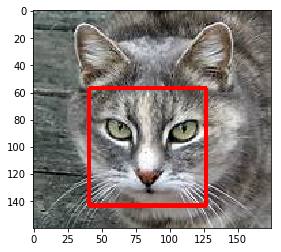

../images/haar_images/cat_2.jpeg


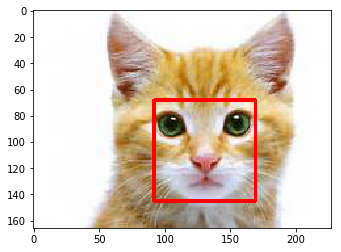

In [2]:
import numpy as np
import cv2
import os
import glob
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

%matplotlib inline

HAAR_PRETRAINED_MODELS_SRC = os.path.join("..","..","dependencies","haar_cascade")

IMAGE_SRC = os.path.join("..","images","haar_images","cat*.jpeg")

cat_face_cascade = cv2.CascadeClassifier(os.path.join(HAAR_PRETRAINED_MODELS_SRC,'haarcascade_frontalcatface.xml'))


for image in glob.glob(IMAGE_SRC):
    print(image)
    img = mpimg.imread(image)

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #Detect Cat Faces
    faces = cat_face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        #Mark the detected faced faces by drawing a rectangle
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        
    plt.imshow(img)
    plt.show()